# **Term Project - Suitable Conditions for Plant Growth**
# **CS 422 - John Jarvis**

# <ins>Purpose<ins>

This project intends to demonstrate how machine learning tools can be utilized to predict the success or failure of a plant given specific conditions. Many conditions play a role in plant growth such as soil type, watering frequency, exposure to sunlight, fertilizer, humidity, and temperature. These are factors that will be considered in this project, but its important to keep in mind that there are many other factors that can play a role as well such as hardiness zones, altitude, seasonality, pest resistance, genetics, and many more.



In [85]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error


# <ins> Setup and Initial Data View<ins>

In [86]:
#load the data
plantData = pd.read_csv('plant_growth_data.csv')
print(plantData.head())
print(plantData.tail())

  Soil_Type  Sunlight_Hours Water_Frequency Fertilizer_Type  Temperature  \
0      loam        5.192294       bi-weekly        chemical    31.719602   
1     sandy        4.033133          weekly         organic    28.919484   
2      loam        8.892769       bi-weekly            none    23.179059   
3      loam        8.241144       bi-weekly            none    18.465886   
4     sandy        8.374043       bi-weekly         organic    18.128741   

    Humidity  Growth_Milestone  
0  61.591861                 0  
1  52.422276                 1  
2  44.660539                 0  
3  46.433227                 0  
4  63.625923                 0  
    Soil_Type  Sunlight_Hours Water_Frequency Fertilizer_Type  Temperature  \
188     sandy           5.652           daily            none         28.0   
189      clay           7.528          weekly        chemical         30.5   
190      loam           4.934       bi-weekly            none         24.5   
191     sandy           8.273    

# Note:
* We see here the data for Soil_Type, Fertilizer_Type, and Water_Frequency are of type String

* Growth_Milestone is either 0 or 1

* these will need to be handled for later analaysis

In [87]:
#check for missing values
print("Missing values:\n", plantData.isnull().sum(), "\n")

#check for data types
print("Data types:\n", plantData.dtypes, "\n")

#check for duplicates
print("Duplicates:\n", plantData.duplicated().sum(), "\n")

#print shape
print("Shape:", plantData.shape, "\n")

Missing values:
 Soil_Type           0
Sunlight_Hours      0
Water_Frequency     0
Fertilizer_Type     0
Temperature         0
Humidity            0
Growth_Milestone    0
dtype: int64 

Data types:
 Soil_Type            object
Sunlight_Hours      float64
Water_Frequency      object
Fertilizer_Type      object
Temperature         float64
Humidity            float64
Growth_Milestone      int64
dtype: object 

Duplicates:
 0 

Shape: (193, 7) 



# Note: 

* No missing or duplicate values in dataset

Statistical summary:
        Sunlight_Hours  Temperature    Humidity  Growth_Milestone
count      193.000000   193.000000  193.000000        193.000000
mean         6.826484    25.076087   58.098927          0.497409
std          1.599509     5.354170   12.631799          0.501294
min          4.033133    15.200000   30.567682          0.000000
25%          5.477000    20.637095   49.300000          0.000000
50%          6.833290    25.912336   59.182806          0.000000
75%          8.241144    29.757938   69.100000          1.000000
max          9.913903    34.810103   79.648240          1.000000 



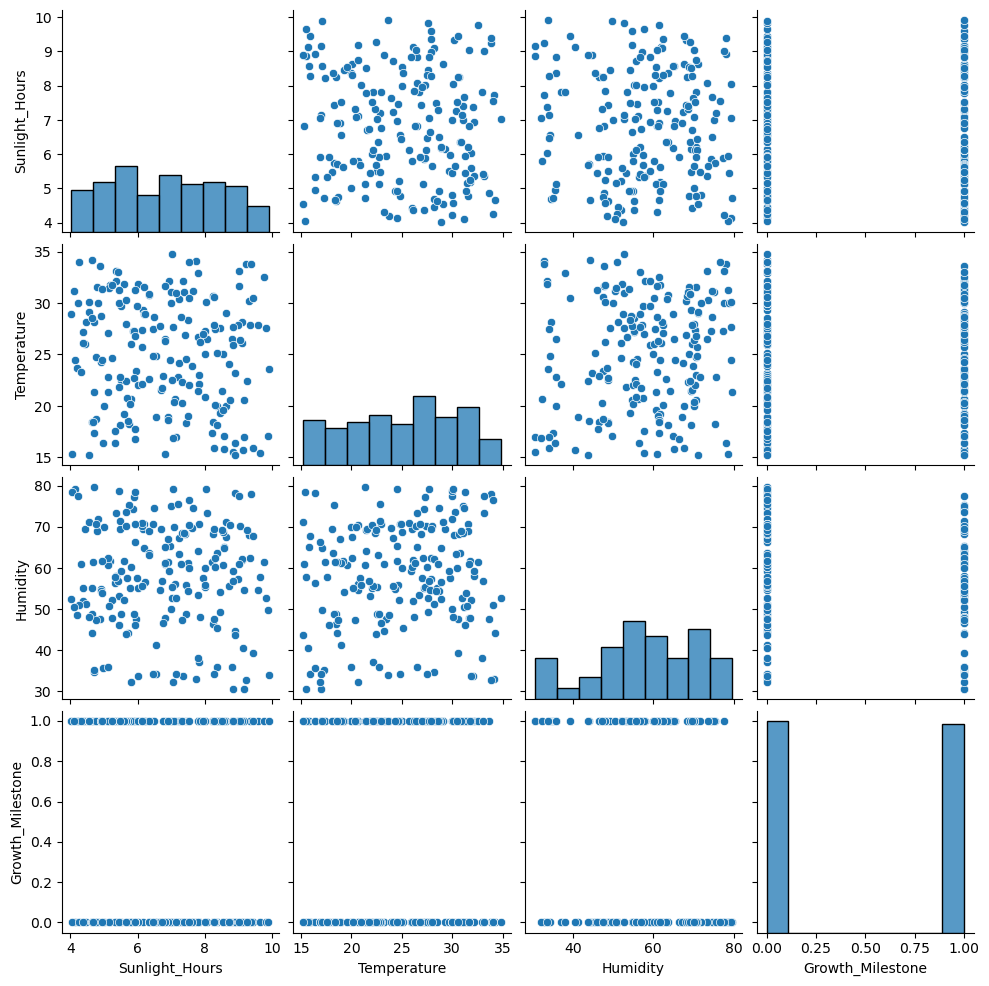

In [88]:
#statistical summary
print("Statistical summary:\n", plantData.describe(), "\n")

#plot the data
sns.pairplot(plantData)
plt.show()

# Note:

* with water freq, soil type, and fertilizer type missing, we can see that we need to encode these somehow

# <ins>Visualizing the Data<ins>

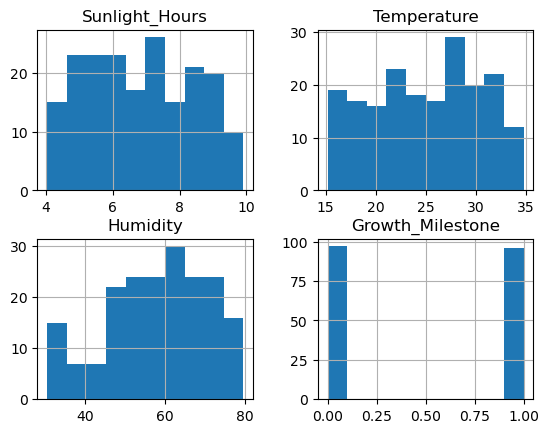

In [89]:
#histogram of each column with numerical values
plantData.hist()
plt.show()

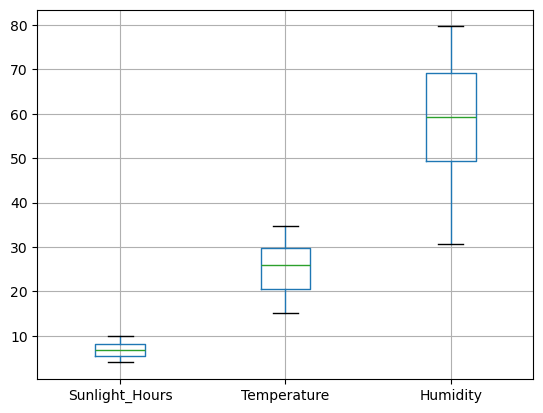

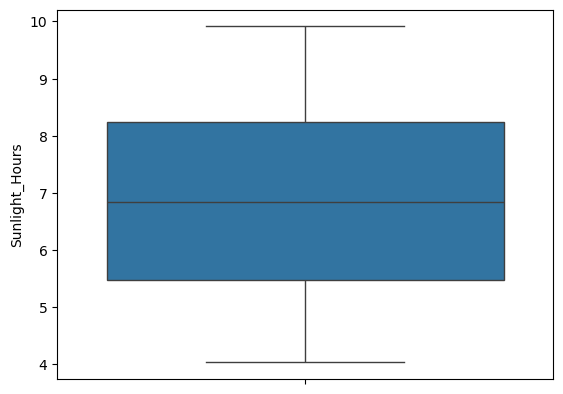

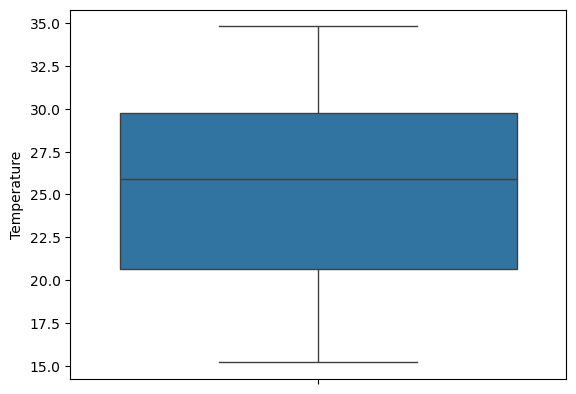

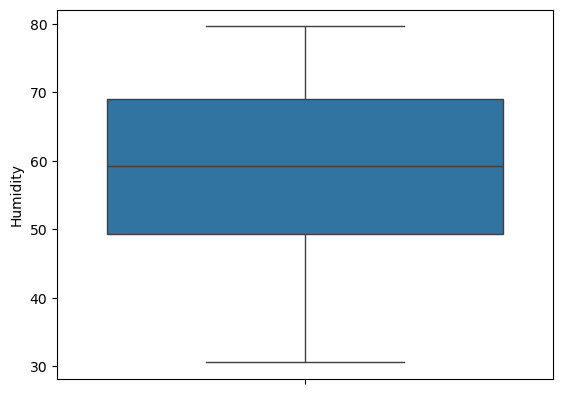

Growth_Milestone
0    97
1    96
Name: count, dtype: int64


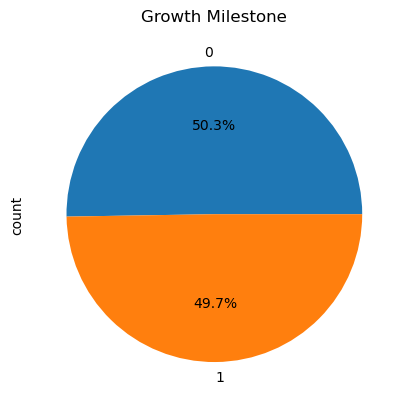

  Soil_Type  Sunlight_Hours Water_Frequency Fertilizer_Type  Temperature  \
0      loam        5.192294       bi-weekly        chemical    31.719602   
1     sandy        4.033133          weekly         organic    28.919484   
2      loam        8.892769       bi-weekly            none    23.179059   
3      loam        8.241144       bi-weekly            none    18.465886   
4     sandy        8.374043       bi-weekly         organic    18.128741   

    Humidity  Growth_Milestone  
0  61.591861                 0  
1  52.422276                 1  
2  44.660539                 0  
3  46.433227                 0  
4  63.625923                 0  


In [90]:
#for each numerical column, plot a boxplot
#drop Growth_Milestone column
plantDataNoMilestone = plantData.drop(columns='Growth_Milestone')
#print boxplot for each column in one figure
plt.figure()
plantDataNoMilestone.boxplot()
plt.show()

for column in plantDataNoMilestone.select_dtypes(include=['float64', 'int64']):
    plt.figure()
    sns.boxplot(plantData[column])
    plt.show()
#pie chart for Growth_Milestone
print(plantData['Growth_Milestone'].value_counts())
plt.figure()
plantData['Growth_Milestone'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Growth Milestone')
plt.show()

print(plantData.head())


# Note:

* Here we can see more clearly that there aren't any outliers and the Growth_Milestone is split pretty evenly, with there being one more "0" than "1" (failure vs. success, respectively)

Soil_Type
clay     67
sandy    64
loam     62
Name: count, dtype: int64
Soil_Type
clay     0.347150
sandy    0.331606
loam     0.321244
Name: proportion, dtype: float64


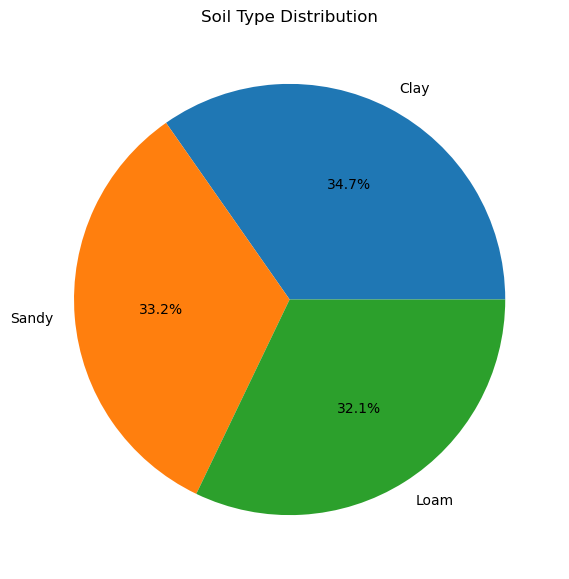

In [91]:
#get counts of each soil type
print(plantData['Soil_Type'].value_counts())
#print percentage of each soil type
print(plantData['Soil_Type'].value_counts(normalize=True))


#plot data with pie chart
plt.figure(figsize=(10, 7))
plt.pie(plantData['Soil_Type'].value_counts(), labels=['Clay', 'Sandy', 'Loam'], autopct='%1.1f%%')
plt.title('Soil Type Distribution')
plt.show()


Fertilizer_Type
none        74
chemical    65
organic     54
Name: count, dtype: int64
Fertilizer_Type
none        0.383420
chemical    0.336788
organic     0.279793
Name: proportion, dtype: float64


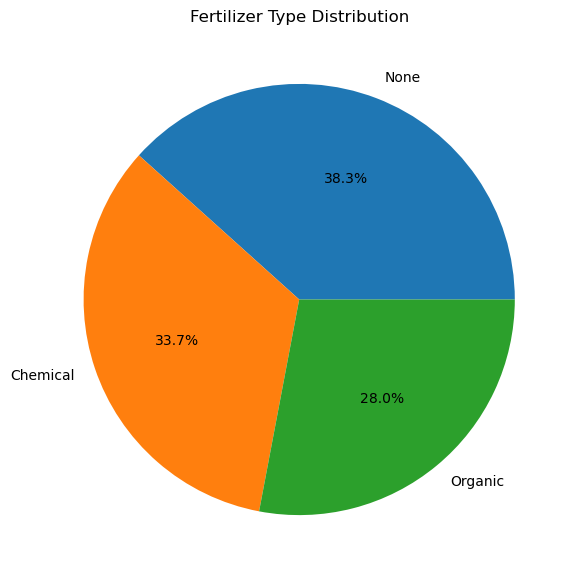

In [92]:
#get counts of each fertilizer type
print(plantData['Fertilizer_Type'].value_counts())
#print percentage of each fertilizer type
print(plantData['Fertilizer_Type'].value_counts(normalize=True))

#plot data with pie chart
plt.figure(figsize=(10, 7))
plt.pie(plantData['Fertilizer_Type'].value_counts(), labels=['None', 'Chemical', 'Organic'], autopct='%1.1f%%')
plt.title('Fertilizer Type Distribution')
plt.show()


Water_Frequency
daily        74
bi-weekly    60
weekly       59
Name: count, dtype: int64
Water_Frequency
daily        0.383420
bi-weekly    0.310881
weekly       0.305699
Name: proportion, dtype: float64


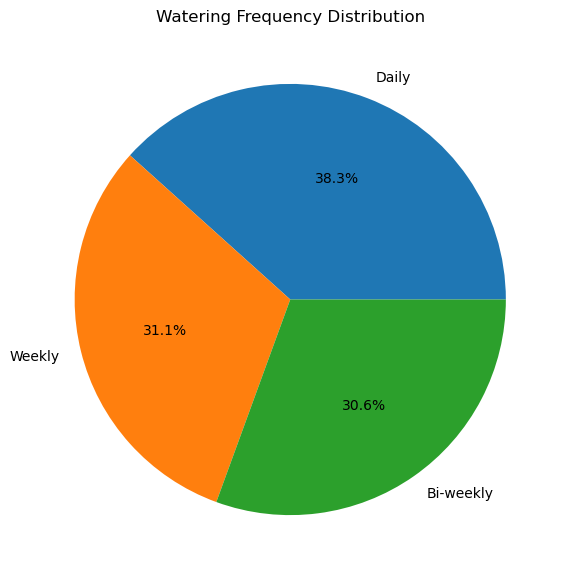

In [93]:
#get counts of Watering_Frequency
print(plantData['Water_Frequency'].value_counts())
#print percentage of Watering_Frequency
print(plantData['Water_Frequency'].value_counts(normalize=True))

#plot data with pie chart
plt.figure(figsize=(10, 7))
plt.pie(plantData['Water_Frequency'].value_counts(), labels=['Daily', 'Weekly', 'Bi-weekly'], autopct='%1.1f%%')
plt.title('Watering Frequency Distribution')
plt.show()

# Note:

* After viewing these charts we can see that for all three categorical variables, there are roughly an even number of samples for each

* Of slight note is the difference in percentages for fertilizer, though they aren't dramatic

# <ins>Comparing Individual Variables and Success/Failure<ins>
#
#

# Discrete/Categorical:

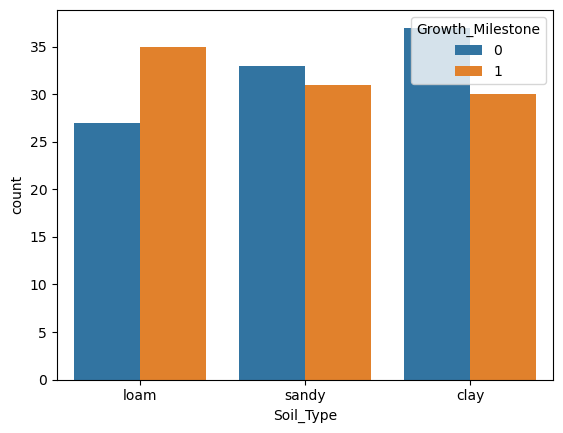

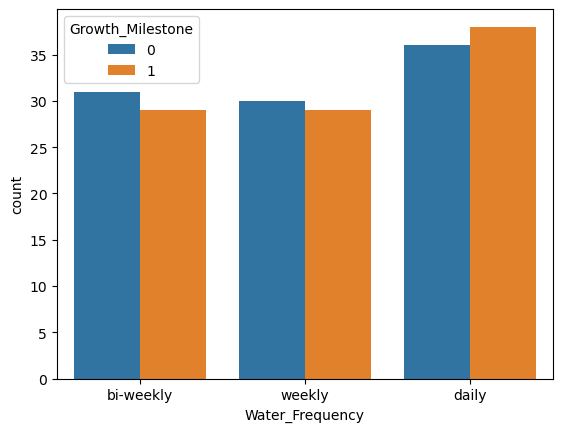

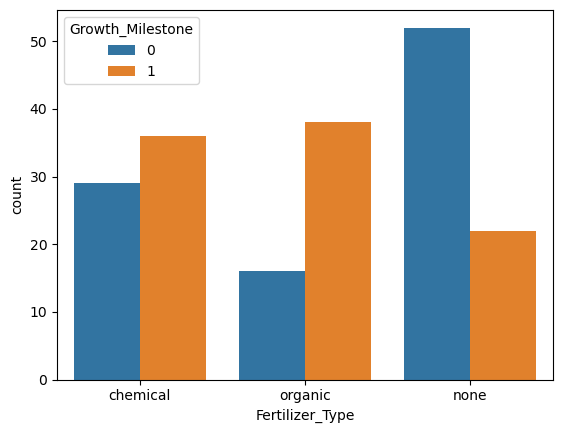

In [94]:
#for each categorical column, we want to see the distribution of the Growth_Milestone
for column in plantData.select_dtypes(include=['object']):
    plt.figure()
    sns.countplot(x=column, hue='Growth_Milestone', data=plantData)
    plt.show()

# Note:

* soil type: 
    * loam has both the highest success rate and a positive correlation
    
    * both sandy and clay soils appear to be negatively correlated with success, with sandy having a higher success rate than clay

* watering frequency:
    * daily watering had a positive correlation, while weekly and bi-weekly had negative correlations

    * might be statistically insignificant, especially between weekly and bi-weekly

* fertilizer type:

    * the most dramatic differences visually

    * no fertilizer appears to have had a significant negative correlation

    * organic appears to have had a significant positive correlation

    * chemical appears to have a slightly positive correlation

**Summary:**

Of these three analyzed individually, fertilizer type appears to be the most significant factor, with loamy soil and higher watering frequency playing a role as well, respectively.

# Continuous Data

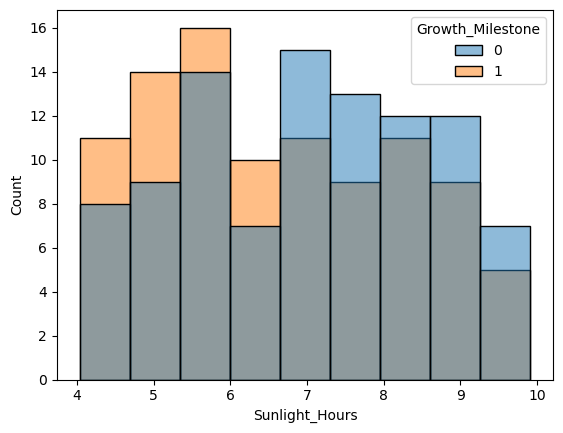

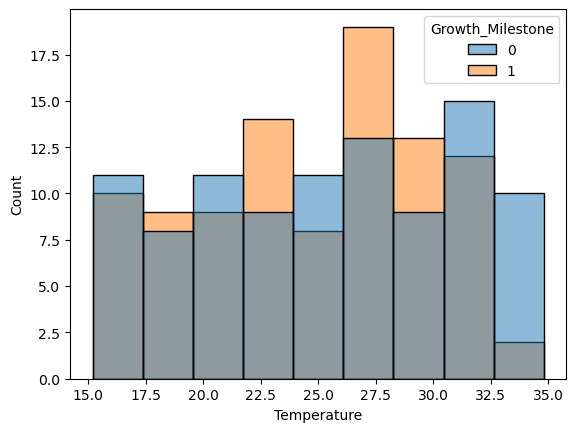

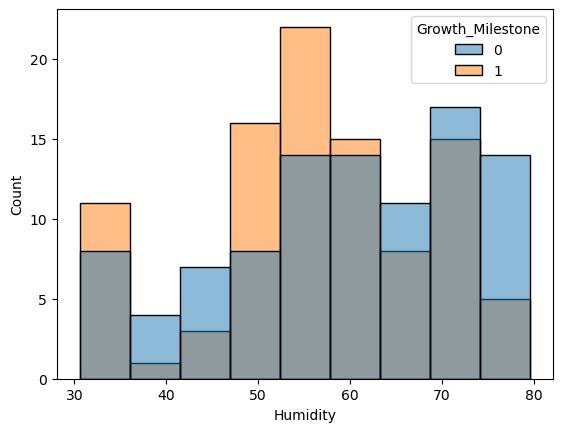

In [95]:
#for each numerical column, we want to see the distribution of the Growth_Milestone
for column in plantDataNoMilestone.select_dtypes(include=['float64']):
    plt.figure()
    sns.histplot(x=column, hue='Growth_Milestone', data=plantData)
    plt.show()


# Note:

* sunlight_hours: success seems to be slightly correlated with sunlight hours in the 4 - 6.5 range

* temperature: seems inconclusive, though 26.5 - 27.5 appears to have a higher suceess rate

* humidity: seems more likely for success around 52.5 - 55 %, but there's also a little indication that some plants do better at a lower humidity. 

# Intervariable Analysis (does one independent variable have anything to do with another?)



<ins>1. Stacked bar chart of Soil Type vs Water Frequency<ins>

<ins>2. Stacked bar chart of Soil Type vs Fertilizer Type<ins>

<ins>3. Stacked bar chart of Fertilizer Type vs Water Frequency<ins>

Growth_Milestone            0   1
Soil_Type Water_Frequency        
clay      bi-weekly         9   9
          daily            11   8
          weekly           17  13
loam      bi-weekly        12  16
          daily             8  12
          weekly            7   7
sandy     bi-weekly        10   4
          daily            17  18
          weekly            6   9


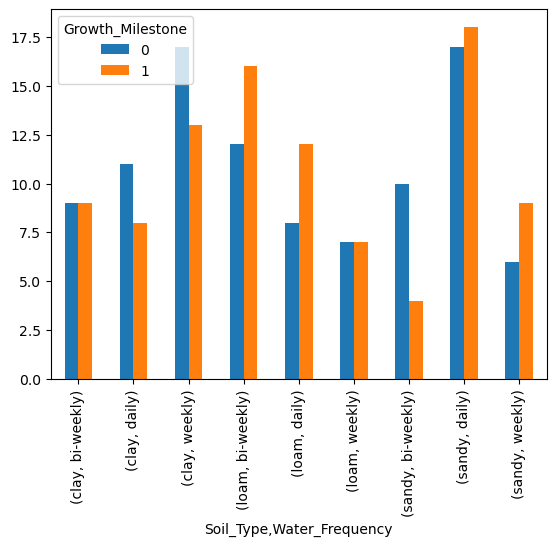

Growth_Milestone            0   1
Soil_Type Fertilizer_Type        
clay      chemical         11  14
          none             17   7
          organic           9   9
loam      chemical          8   9
          none             15   9
          organic           4  17
sandy     chemical         10  13
          none             20   6
          organic           3  12


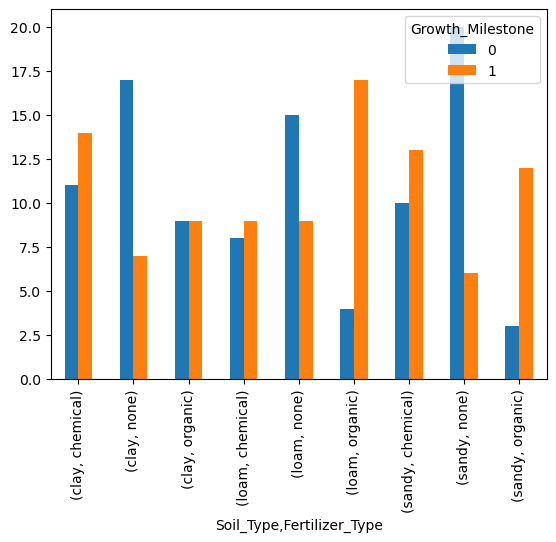

Growth_Milestone                  0   1
Fertilizer_Type Water_Frequency        
chemical        bi-weekly        12  13
                daily             9  12
                weekly            8  11
none            bi-weekly        15   6
                daily            19  10
                weekly           18   6
organic         bi-weekly         4  10
                daily             8  16
                weekly            4  12
Fertilizer_Type            chemical  none  organic
Soil_Type Water_Frequency                         
clay      bi-weekly              10     3        5
          daily                   5     8        6
          weekly                 10    13        7
loam      bi-weekly               7    14        7
          daily                   6     6        8
          weekly                  4     4        6
sandy     bi-weekly               8     4        2
          daily                  10    15       10
          weekly                  5     7        3

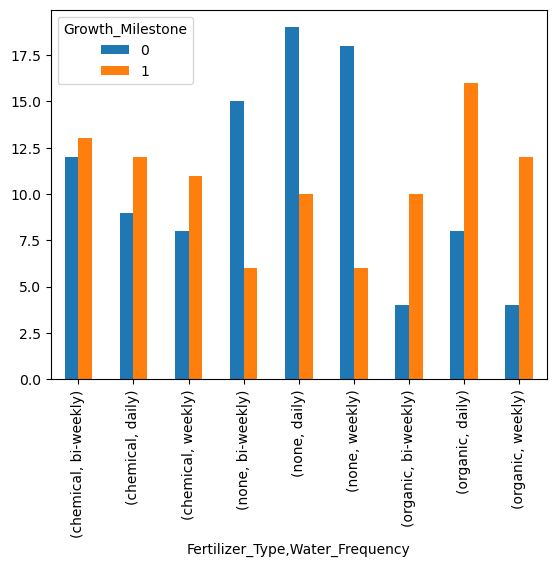

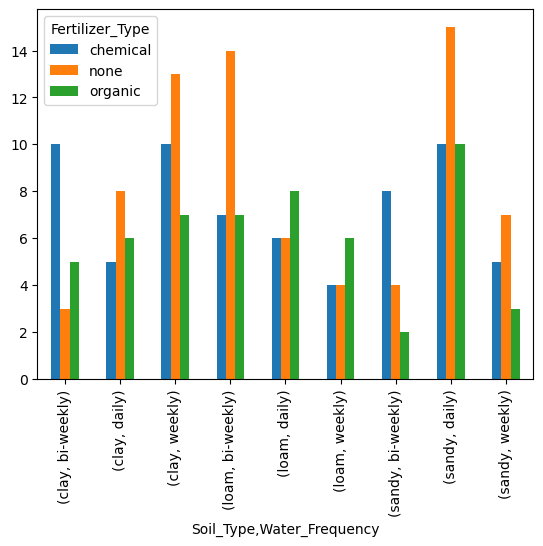

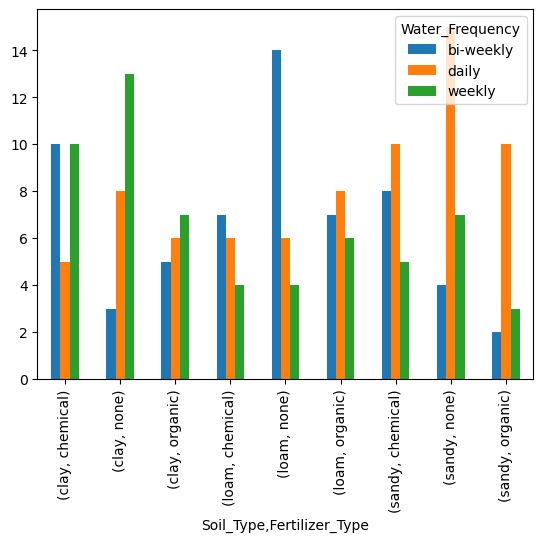

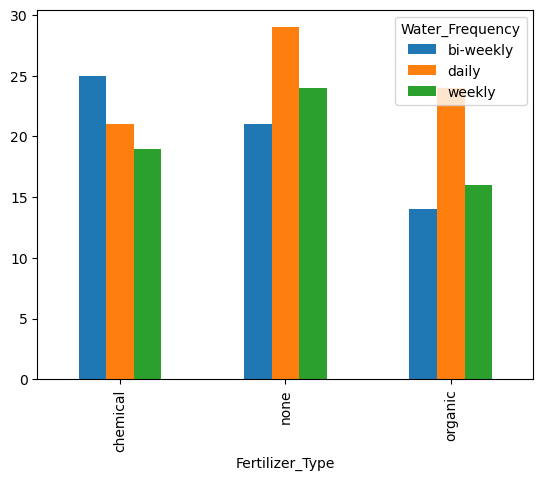

Water_Frequency            bi-weekly  daily  weekly
Soil_Type Fertilizer_Type                          
clay      chemical                10      5      10
          none                     3      8      13
          organic                  5      6       7
loam      chemical                 7      6       4
          none                    14      6       4
          organic                  7      8       6
sandy     chemical                 8     10       5
          none                     4     15       7
          organic                  2     10       3


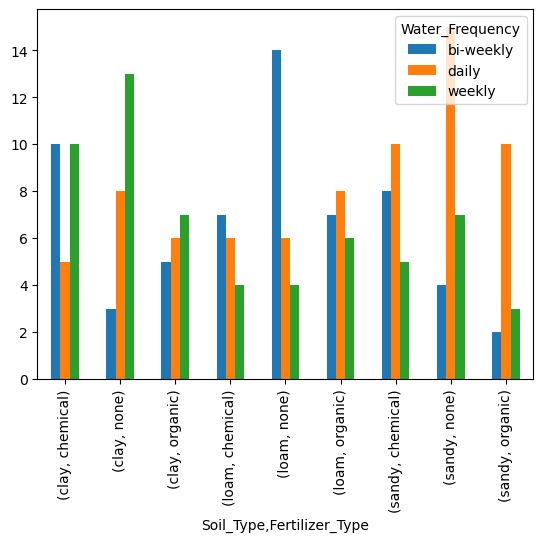

In [96]:
#stacked bar chart for Soil_Type vs Water_Frequency vs Growth_Milestone for cross tabulation with seperate bars for each Growth_Milestone
crossTab = pd.crosstab([plantData['Soil_Type'], plantData['Water_Frequency']], plantData['Growth_Milestone'], plantData['Growth_Milestone'], aggfunc='count')
print(crossTab)
crossTab.plot(kind='bar')
plt.show()

#stacked bar chart for Soil_Type vs Fertilizer_Type vs Growth_Milestone for cross tabulation with seperate bars for each Growth_Milestone
crossTab = pd.crosstab([plantData['Soil_Type'], plantData['Fertilizer_Type']], plantData['Growth_Milestone'], plantData['Growth_Milestone'], aggfunc='count')
print(crossTab)
crossTab.plot(kind='bar')
plt.show()

#stacked bar chart for Fertilizer_Type vs Water_Frequency vs Growth_Milestone for cross tabulation with seperate bars for each Growth_Milestone
crossTab = pd.crosstab([plantData['Fertilizer_Type'], plantData['Water_Frequency']], plantData['Growth_Milestone'], plantData['Growth_Milestone'], aggfunc='count')
print(crossTab)
crossTab.plot(kind='bar')

#stacked bar chart for Soil_Type vs Water_Frequency vs Fertilizer_Type for cross tabulation with seperate bars for each Fertilizer_Type
crossTab = pd.crosstab([plantData['Soil_Type'], plantData['Water_Frequency']], plantData['Fertilizer_Type'], plantData['Fertilizer_Type'], aggfunc='count')
print(crossTab)
crossTab.plot(kind='bar')

#stacked bar chart for Soil_Type vs Water_Frequency vs Fertilizer_Type for cross tabulation with seperate bars for each Water_Frequency
crossTab = pd.crosstab([plantData['Soil_Type'], plantData['Fertilizer_Type']], plantData['Water_Frequency'], plantData['Water_Frequency'], aggfunc='count')
print(crossTab)
crossTab.plot(kind='bar')

#stacked bar chart for Fertilizer_Type vs Water_Frequency for cross tabulation
crossTab = pd.crosstab(plantData['Fertilizer_Type'], plantData['Water_Frequency'], plantData['Growth_Milestone'], aggfunc='count')
print(crossTab)
crossTab.plot(kind='bar')
plt.show()

#stacked bar chart for Soil_Type vs Water_Frequency vs Fertilizer_Type for cross tabulation
crossTab = pd.crosstab([plantData['Soil_Type'], plantData['Fertilizer_Type']], plantData['Water_Frequency'], plantData['Growth_Milestone'], aggfunc='count')
print(crossTab)
crossTab.plot(kind='bar')
plt.show()



<ins>Pairplots for Sunlight, Temperature, and Humidity<ins>

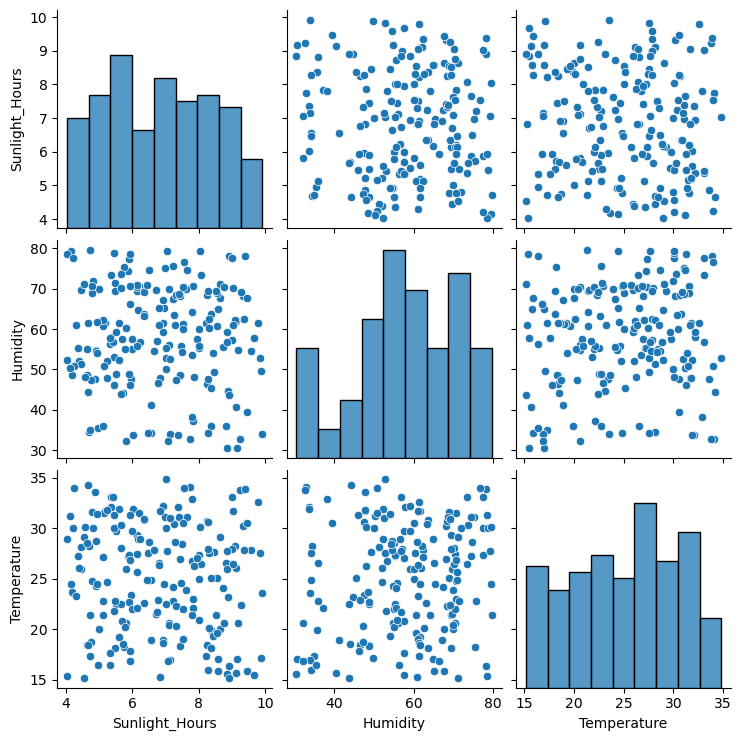

In [97]:
#pairplot for Sunlight_Hours, Humidity, and Temperature
sns.pairplot(plantData[['Sunlight_Hours', 'Humidity', 'Temperature']])
plt.show()


# Moving Towards a Learning Algorithm

<ins>Split the data<ins>

In [98]:
#split the data into features and target
X = plantData.drop(columns='Growth_Milestone', axis=1)
y = plantData['Growth_Milestone']


<ins>Encode the non-numerical data<ins>

In [99]:
# Label encoding for categorical features
label_encoders = {}
for col in X.select_dtypes(include='object').columns:
    encoder = LabelEncoder()
    X[col] = encoder.fit_transform(X[col])
    label_encoders[col] = encoder

# Statistical Analysis

<ins>ANOVA<ins>

In [100]:
#ANOVA test for numerical features
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif

#ANOVA test for numerical features
numerical_features = X.select_dtypes(include=['float64']).columns
anova_scores = f_classif(X[numerical_features], y)
anova_results = pd.DataFrame(anova_scores, columns=numerical_features, index=['F-statistic', 'p-value'])
print(anova_results)
#print anova_results to a visually appealing table





             Sunlight_Hours  Temperature  Humidity
F-statistic        2.895978     0.549833  3.300261
p-value            0.090428     0.459297  0.070836


<ins>Chi square<ins>

In [101]:
#chi-squared test for categorical features
categorical_features = X.select_dtypes(include=['int64']).columns
chi2_scores = chi2(X[categorical_features], y)
chi2_results = pd.DataFrame(chi2_scores, columns=categorical_features, index=['Chi-squared', 'p-value'])
print(chi2_results)


             Soil_Type  Water_Frequency  Fertilizer_Type
Chi-squared   0.130766         0.005155         1.226920
p-value       0.717640         0.942764         0.268007


# Thoughts:

Generally speaking, a p-value of .05 or less is considered statistically significant. While none of the variables we're considering would be considered statistically significant, there are a couple that might be worth keeping in mind:

* Humidity: ~.07

* Sunlight Hours: ~.09

# Preprocess the Data

<ins> Set features and target<ins>

In [102]:
#set features and target
X = plantData.drop(columns='Growth_Milestone', axis=1)
y = plantData['Growth_Milestone']

<ins>Split and train<ins>

In [103]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<ins>Encode the categorical data<ins>

In [104]:
# Initialize the OneHotEncoder
onehot_encoder = OneHotEncoder()

# Encode 'Soil_Type'
X_train_encoded = onehot_encoder.fit_transform(X_train[['Soil_Type']]).toarray()
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=onehot_encoder.get_feature_names_out(['Soil_Type']))
X_train = X_train.drop('Soil_Type', axis=1)
X_train = pd.concat([X_train.reset_index(drop=True), X_train_encoded_df.reset_index(drop=True)], axis=1)
X_train.head()

# Same for test data
X_test_encoded = onehot_encoder.transform(X_test[['Soil_Type']]).toarray()
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=onehot_encoder.get_feature_names_out(['Soil_Type']))
X_test = X_test.drop('Soil_Type', axis=1)
X_test = pd.concat([X_test.reset_index(drop=True), X_test_encoded_df.reset_index(drop=True)], axis=1)
X_test.head()

# Repeat for Fertilizer_Type and Water_Frequency
#repeat for Fertilizer_Type and Water_Frequency
X_train_encoded = onehot_encoder.fit_transform(X_train[['Fertilizer_Type']]).toarray()
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=onehot_encoder.get_feature_names_out(['Fertilizer_Type']))
X_train = X_train.drop('Fertilizer_Type', axis=1)
X_train = pd.concat([X_train.reset_index(drop=True), X_train_encoded_df.reset_index(drop=True)], axis=1)
X_train.head()

#same for test data
X_test_encoded = onehot_encoder.transform(X_test[['Fertilizer_Type']]).toarray()
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=onehot_encoder.get_feature_names_out(['Fertilizer_Type']))
X_test = X_test.drop('Fertilizer_Type', axis=1)
X_test = pd.concat([X_test.reset_index(drop=True), X_test_encoded_df.reset_index(drop=True)], axis=1)
X_test.head()

#repeat for Water_Frequency
X_train_encoded = onehot_encoder.fit_transform(X_train[['Water_Frequency']]).toarray()
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=onehot_encoder.get_feature_names_out(['Water_Frequency']))
X_train = X_train.drop('Water_Frequency', axis=1)
X_train = pd.concat([X_train.reset_index(drop=True), X_train_encoded_df.reset_index(drop=True)], axis=1)
X_train.head()

#same for test data
X_test_encoded = onehot_encoder.transform(X_test[['Water_Frequency']]).toarray()
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=onehot_encoder.get_feature_names_out(['Water_Frequency']))
X_test = X_test.drop('Water_Frequency', axis=1)
X_test = pd.concat([X_test.reset_index(drop=True), X_test_encoded_df.reset_index(drop=True)], axis=1)
X_test.head()

#check for null values
print("Null values in training data:\n", X_train.isnull().sum(), "\n")
print("Null values in test data:\n", X_test.isnull().sum(), "\n")
display(X_train.head())


Null values in training data:
 Sunlight_Hours               0
Temperature                  0
Humidity                     0
Soil_Type_clay               0
Soil_Type_loam               0
Soil_Type_sandy              0
Fertilizer_Type_chemical     0
Fertilizer_Type_none         0
Fertilizer_Type_organic      0
Water_Frequency_bi-weekly    0
Water_Frequency_daily        0
Water_Frequency_weekly       0
dtype: int64 

Null values in test data:
 Sunlight_Hours               0
Temperature                  0
Humidity                     0
Soil_Type_clay               0
Soil_Type_loam               0
Soil_Type_sandy              0
Fertilizer_Type_chemical     0
Fertilizer_Type_none         0
Fertilizer_Type_organic      0
Water_Frequency_bi-weekly    0
Water_Frequency_daily        0
Water_Frequency_weekly       0
dtype: int64 



,Sunlight_Hours,Temperature,Humidity,Soil_Type_clay,Soil_Type_loam,Soil_Type_sandy,Fertilizer_Type_chemical,Fertilizer_Type_none,Fertilizer_Type_organic,Water_Frequency_bi-weekly,Water_Frequency_daily,Water_Frequency_weekly
0,6.936717,32.168255,59.182806,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,4.789000,31.600000,68.900000,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,9.043000,26.400000,70.100000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,6.462298,27.517198,34.175036,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,6.832000,31.700000,47.800000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


# Normalize and Standardize Data

<ins> Normalize the data for columns with non-normal distributions<ins>

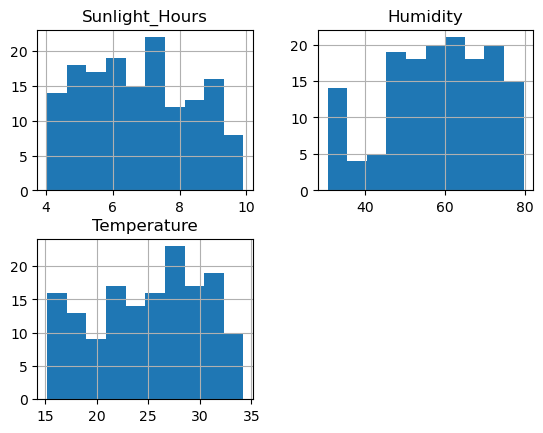

       Sunlight_Hours    Humidity  Temperature
count      154.000000  154.000000   154.000000
mean         6.763327   58.241318    25.186909
std          1.607065   12.979650     5.264864
min          4.033133   30.567682    15.200000
25%          5.441111   48.934734    21.381203
50%          6.787000   59.175622    25.992267
75%          8.029360   69.495227    29.599045
max          9.913903   79.648240    34.223811


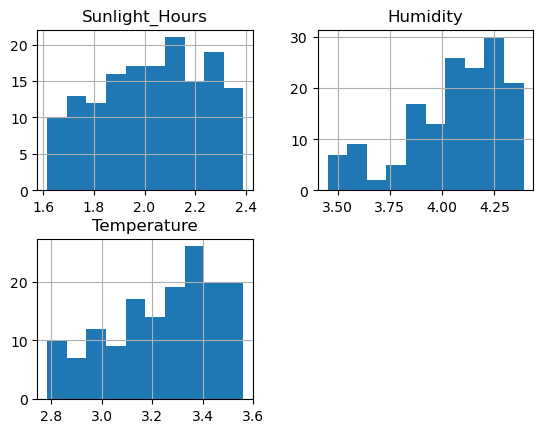

       Sunlight_Hours    Humidity  Temperature
count      154.000000  154.000000   154.000000
mean         2.027561    4.054848     3.243692
std          0.211413    0.239912     0.212508
min          1.616043    3.452134     2.785011
25%          1.862701    3.910708     3.108221
50%          2.052451    4.097267     3.295550
75%          2.200481    4.255545     3.420952
max          2.390037    4.390097     3.561722


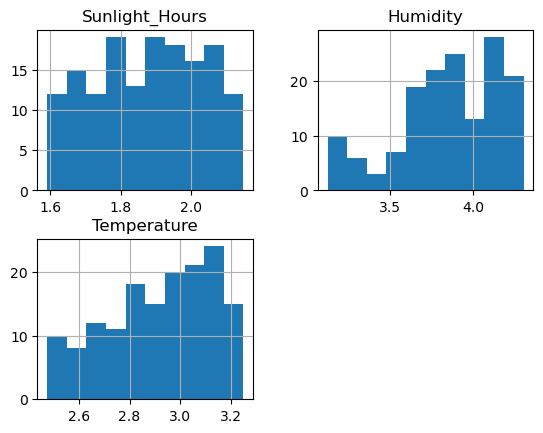

       Sunlight_Hours    Humidity  Temperature
count      154.000000  154.000000   154.000000
mean         1.879027    3.852925     2.916287
std          0.151970    0.304215     0.211441
min          1.591772    3.126709     2.477125
25%          1.758851    3.657673     2.775518
50%          1.893326    3.896855     2.962202
75%          2.002444    4.111355     3.093315
max          2.148234    4.302545     3.246705


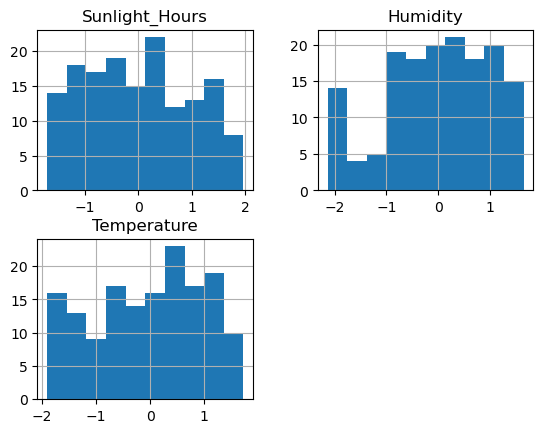

       Sunlight_Hours      Humidity   Temperature
count    1.540000e+02  1.540000e+02  1.540000e+02
mean     1.026596e-15  6.113436e-16 -2.753930e-16
std      1.003263e+00  1.003263e+00  1.003263e+00
min     -1.704412e+00 -2.139035e+00 -1.903087e+00
25%     -8.254358e-01 -7.193528e-01 -7.252082e-01
50%      1.477877e-02  7.221704e-02  1.534675e-01
75%      7.903623e-01  8.698714e-01  8.407685e-01
max      1.966849e+00  1.654649e+00  1.722055e+00


In [105]:
#histogram of sunlighthours, humidity, and temperature
X_train[['Sunlight_Hours', 'Humidity', 'Temperature']].hist()
plt.show()
#print the distribution of the sunlight hours, humidity, and temperature
print(X_train[['Sunlight_Hours', 'Humidity', 'Temperature']].describe())

#histogram of log transformation of sunlight hours, humidity, and temperature
log = np.log1p(X_train[['Sunlight_Hours', 'Humidity', 'Temperature']])
log.hist()
plt.title('Log Transformation')
plt.show()
#print the distribution of the log transformation of the sunlight hours, humidity, and temperature
print(log.describe())

#histogram of cube root transformation of sunlight hours, humidity, and temperature
cube_root = np.cbrt(X_train[['Sunlight_Hours', 'Humidity', 'Temperature']])
cube_root.hist()
plt.title('Cube Root Transformation')
plt.show()
#print the distribution of the cube root transformation of the sunlight hours, humidity, and temperature
print(cube_root.describe())

#histogram of standard scaling of sunlight hours, humidity, and temperature
scaler = StandardScaler()
standard_scaled = scaler.fit_transform(X_train[['Sunlight_Hours', 'Humidity', 'Temperature']])
standard_scaled = pd.DataFrame(standard_scaled, columns=['Sunlight_Hours', 'Humidity', 'Temperature'])
standard_scaled.hist()
plt.title('Standard Scaling')
plt.show()
#print the distribution of the standard scaling of the sunlight hours, humidity, and temperature
print(standard_scaled.describe())





# Notes:

* humidity has a bimodal nature, so scaling won't help us normalize the data
    
    * we'll use standard scaler here

* temperature appears slightly better with the cubic root transformation
    
    * using cbrt here

* sunlight doesn't have much difference between log and cbrt, but I prefer both of them over the standard scaler

    * using log here



# Applying Transformations

In [106]:
#apply standard scaling to humidity
scaler = StandardScaler()
X_train['Humidity'] = scaler.fit_transform(X_train[['Humidity']])
X_test['Humidity'] = scaler.transform(X_test[['Humidity']])

#apply cubic root transformation to temperature
X_train['Temperature'] = np.cbrt(X_train['Temperature'])
X_test['Temperature'] = np.cbrt(X_test['Temperature'])

#apply log transformation to sunlight hours
X_train['Sunlight_Hours'] = np.log1p(X_train['Sunlight_Hours'])
X_test['Sunlight_Hours'] = np.log1p(X_test['Sunlight_Hours'])



# Models

<ins>Random Forest<ins>

X_train shape: (154, 12)
X_test shape: (39, 12)


Random Forest Classifier Accuracy: 0.6153846153846154


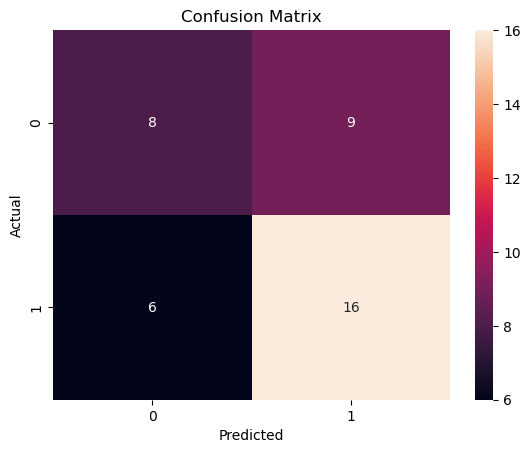

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.47      0.52        17
           1       0.64      0.73      0.68        22

    accuracy                           0.62        39
   macro avg       0.61      0.60      0.60        39
weighted avg       0.61      0.62      0.61        39



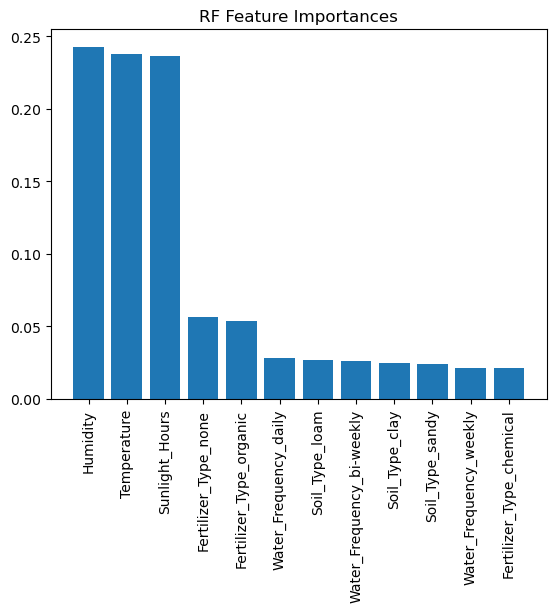

In [107]:
#random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#print the shape
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Classifier Accuracy:", accuracy)
rf_accuracy = pd.DataFrame({'Model': ['Random Forest Classifier'], 'Accuracy': [accuracy]})

#confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
#plot confusion matrix
plt.figure()
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#classification report
from sklearn.metrics import classification_report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# #feature importance
importances = rf.feature_importances_
features = X_train.columns
indices = np.argsort(importances)[::-1]
plt.figure()
plt.title("RF Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), [features[i] for i in indices], rotation=90)
plt.show()




<ins>Logistic Regression<ins>

Logistic Regression Accuracy: 0.5384615384615384


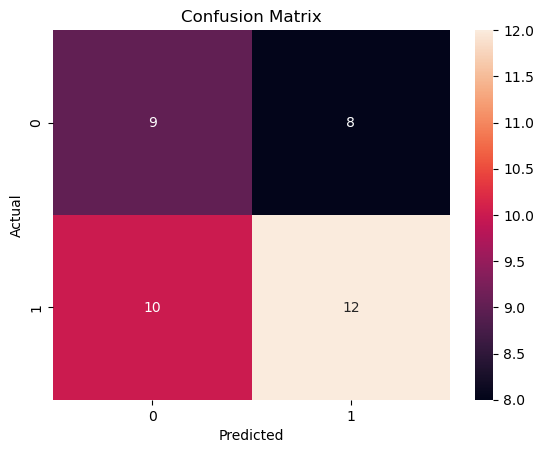

Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.53      0.50        17
           1       0.60      0.55      0.57        22

    accuracy                           0.54        39
   macro avg       0.54      0.54      0.54        39
weighted avg       0.54      0.54      0.54        39



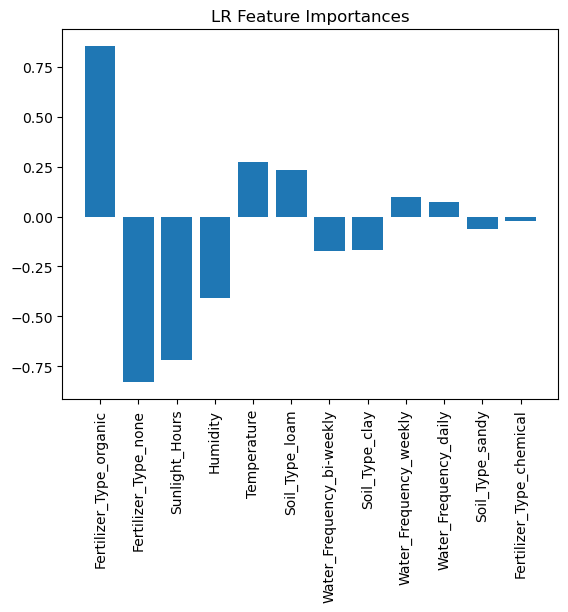

In [108]:
#logistic regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)
lr_accuracy = pd.DataFrame({'Model': ['Logistic Regression'], 'Accuracy': [accuracy]})

#confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
#plot confusion matrix
plt.figure()
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

#feature importance
coefficients = lr.coef_[0]
features = X_train.columns
indices = np.argsort(np.abs(coefficients))[::-1]
plt.figure()
plt.title("LR Feature Importances")
plt.bar(range(X_train.shape[1]), coefficients[indices])
plt.xticks(range(X_train.shape[1]), [features[i] for i in indices], rotation=90)
plt.show()



<ins> Naive Bayes<ins>

Naive Bayes Accuracy: 0.5128205128205128


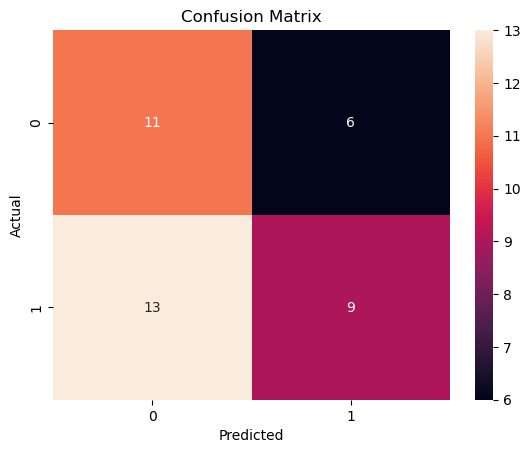

Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.65      0.54        17
           1       0.60      0.41      0.49        22

    accuracy                           0.51        39
   macro avg       0.53      0.53      0.51        39
weighted avg       0.54      0.51      0.51        39



KeyboardInterrupt: 

In [109]:
#naive bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.inspection import permutation_importance

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Naive Bayes Accuracy:", accuracy)
nb_accuracy = pd.DataFrame({'Model': ['Naive Bayes'], 'Accuracy': [accuracy]})

#confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
#plot confusion matrix
plt.figure()
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

#feature importance
result = permutation_importance(nb, X_test, y_test, n_repeats=10, random_state=42)
importances = result.importances_mean
features = X_train.columns
indices = np.argsort(importances)[::-1]

plt.figure()
plt.title("NB Permutation importances")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), [features[i] for i in indices], rotation=90)
plt.show()




<ins>Decision Tree<ins>

Decision Tree Accuracy: 0.6666666666666666


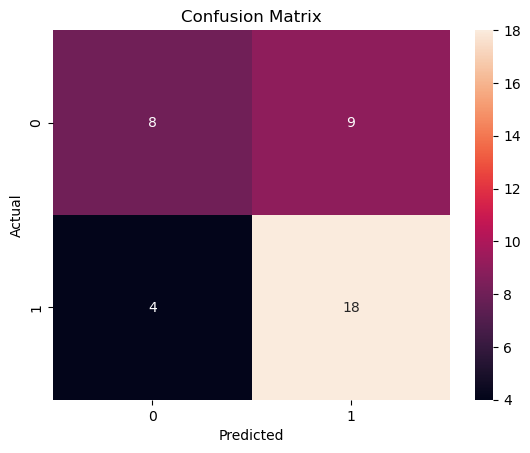

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.47      0.55        17
           1       0.67      0.82      0.73        22

    accuracy                           0.67        39
   macro avg       0.67      0.64      0.64        39
weighted avg       0.67      0.67      0.65        39



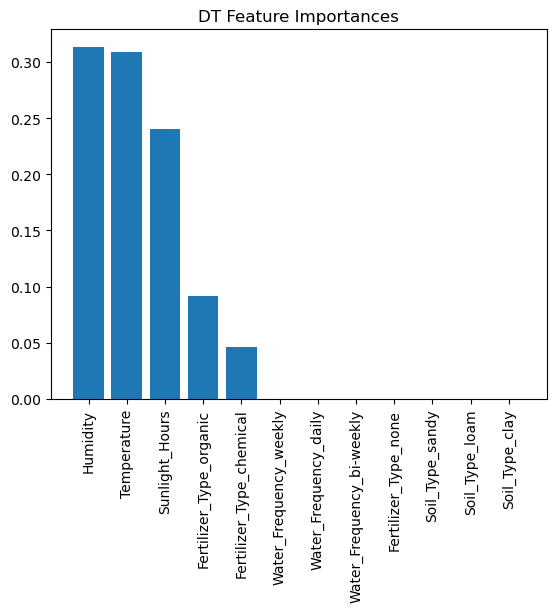

In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree Accuracy:", accuracy)
dt_accuracy = pd.DataFrame({'Model': ['Decision Tree'], 'Accuracy': [accuracy]})

#confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
#plot confusion matrix
plt.figure()
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


#classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

#feature importance
importances = dt.feature_importances_
features = X_train.columns
indices = np.argsort(importances)[::-1]
plt.figure()
plt.title("DT Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), [features[i] for i in indices], rotation=90)
plt.show()



<ins>Support Vector<ins>

Support Vector Classifier Accuracy: 0.5897435897435898


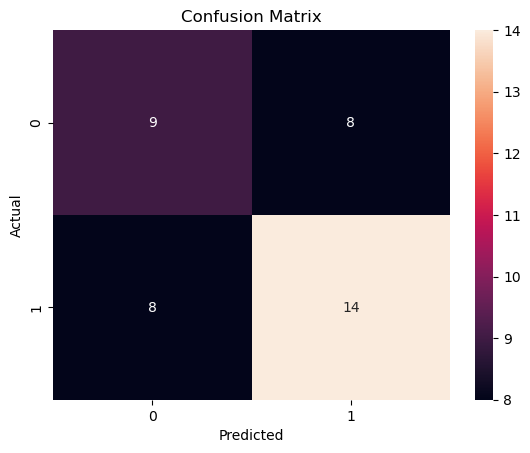

Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.53      0.53        17
           1       0.64      0.64      0.64        22

    accuracy                           0.59        39
   macro avg       0.58      0.58      0.58        39
weighted avg       0.59      0.59      0.59        39



In [ ]:
#support vector classifier
from sklearn.svm import SVC

svc = SVC(random_state=42)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Support Vector Classifier Accuracy:", accuracy)
svc_accuracy = pd.DataFrame({'Model': ['Support Vector Classifier'], 'Accuracy': [accuracy]})

#confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
#plot confusion matrix
plt.figure()
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)




<ins>Gradient Boosting<ins>

Gradient Boosting Classifier Accuracy: 0.46153846153846156


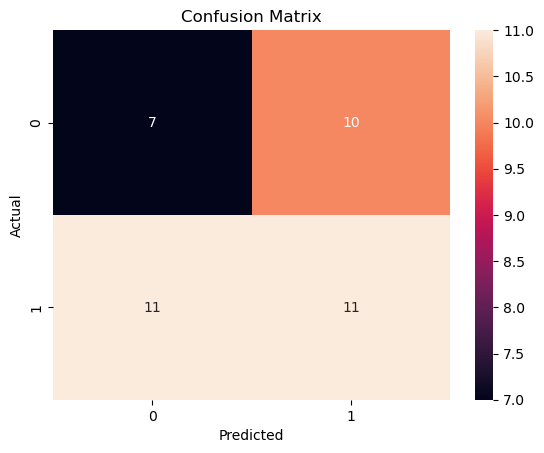

Classification Report:
               precision    recall  f1-score   support

           0       0.39      0.41      0.40        17
           1       0.52      0.50      0.51        22

    accuracy                           0.46        39
   macro avg       0.46      0.46      0.46        39
weighted avg       0.46      0.46      0.46        39



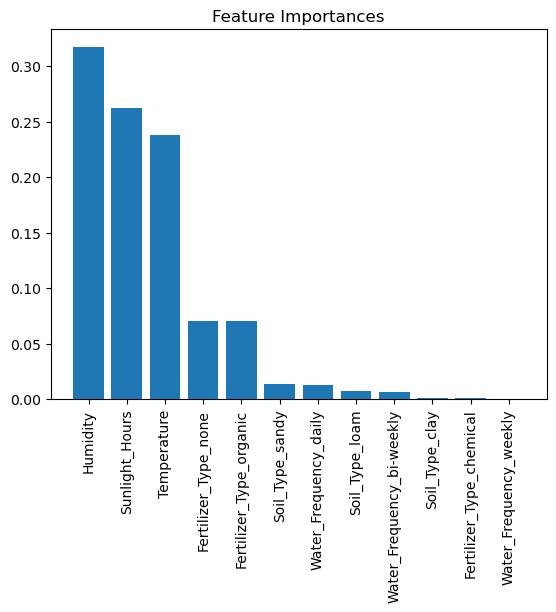

In [ ]:
#gradient boosting classifier
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Gradient Boosting Classifier Accuracy:", accuracy)
gbc_accuracy = pd.DataFrame({'Model': ['Gradient Boosting Classifier'], 'Accuracy': [accuracy]})
#confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
#plot confusion matrix
plt.figure()
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

#feature importance
importances = gbc.feature_importances_
features = X_train.columns
indices = np.argsort(importances)[::-1]
plt.figure()
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), [features[i] for i in indices], rotation=90)
plt.show()



<ins>K-nearest neighbors<ins>

K-Nearest Neighbors Accuracy: 0.6153846153846154


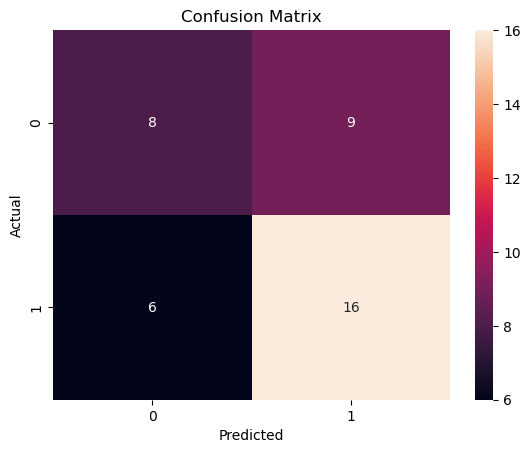

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.47      0.52        17
           1       0.64      0.73      0.68        22

    accuracy                           0.62        39
   macro avg       0.61      0.60      0.60        39
weighted avg       0.61      0.62      0.61        39



In [ ]:
#k-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("K-Nearest Neighbors Accuracy:", accuracy)
knn_accuracy = pd.DataFrame({'Model': ['K-Nearest Neighbors'], 'Accuracy': [accuracy]})

#confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
#plot confusion matrix
plt.figure()
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)




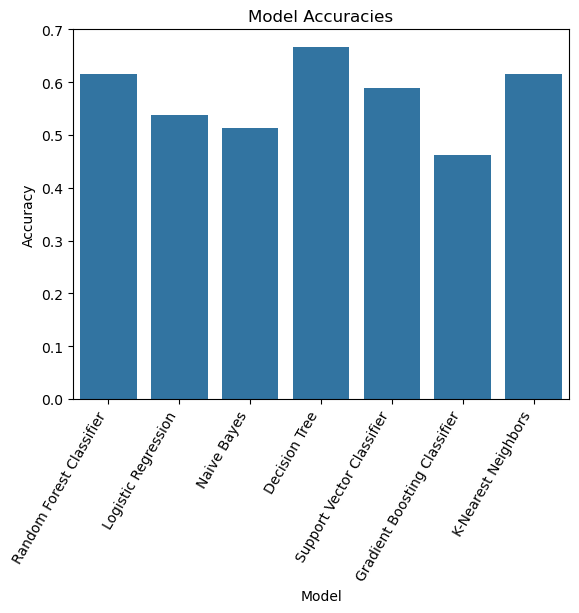

/var/folders/ty/0nfkdh5d48nd2pt7t5hwnhwc0000gn/T/ipykernel_68456/3881036724.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=top_three, palette='viridis')


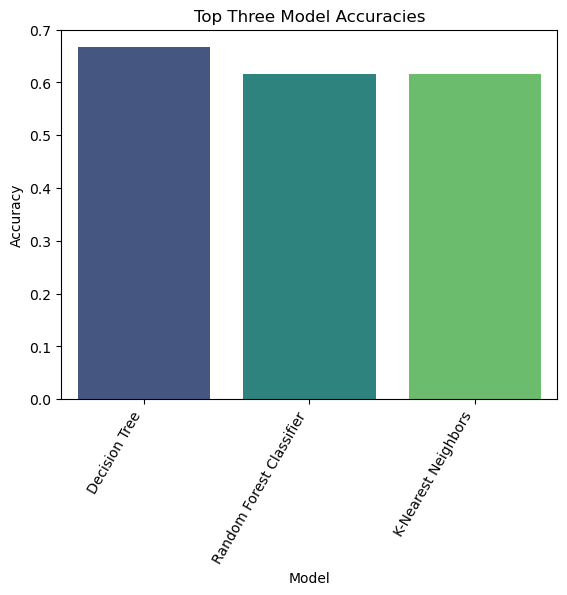

In [ ]:
#plot the accuracies
accuracies = pd.concat([rf_accuracy, lr_accuracy, nb_accuracy, dt_accuracy, svc_accuracy, gbc_accuracy, knn_accuracy])
plt.figure()
sns.barplot(x='Model', y='Accuracy', data=accuracies)
plt.xticks(rotation=60, ha='right')
plt.title('Model Accuracies')
plt.show()

#plot the top three accuracies
top_three = accuracies.nlargest(3, 'Accuracy')
plt.figure()
sns.barplot(x='Model', y='Accuracy', data=top_three, palette='viridis')
plt.xticks(rotation=60, ha='right')
plt.title('Top Three Model Accuracies')
plt.show()




<ins>For the top three models, we'll use cross validation and grid search to tune hyperparamaters to see if we can optimize our accuracy<ins>

In [ ]:
#print the top three accuracies before cross validation
print("Top Three Models Before Cross Validation:\n", top_three)

Top Three Models Before Cross Validation:
                       Model  Accuracy
0             Decision Tree  0.666667
0  Random Forest Classifier  0.615385
0       K-Nearest Neighbors  0.615385


In [ ]:
#for each model in the top 3, perform cross validation
from sklearn.model_selection import cross_val_score

#top three models crossvalidation dataframe
top_three_cv = pd.DataFrame(columns=['Model', 'Accuracy'])

In [ ]:


#for each of the top three previous models, we can use cross validation to get a more reliable accuracy score
from sklearn.model_selection import cross_val_score

if top_three['Model'].str.contains('Random Forest Classifier').any():

    #original accuracy score for random forest
    orig_score = top_three[top_three['Model'] == 'Random Forest Classifier']['Accuracy'].values[0]

    #random forest
    rf = RandomForestClassifier(random_state=42)
    rf_scores = cross_val_score(rf, X_train, y_train, cv=5)
    print("Random Forest Classifier Cross Validation Scores:", rf_scores)
    print("Random Forest Classifier Cross Validation Mean Score:", rf_scores.mean())

    #hyperparameter tuning
    from sklearn.model_selection import GridSearchCV

    #random forest
    rf = RandomForestClassifier(random_state=42)
    param_grid = {'n_estimators': [50, 100, 150, 200],
                'max_depth': [None, 10, 20, 30, 40, 50],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4]}
    grid_search = GridSearchCV(rf, param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    print("Original Random Forest Classifier Accuracy:", orig_score)
    print("Random Forest Best Parameters:", grid_search.best_params_)
    print("Random Forest Best Score:", grid_search.best_score_)
    rf_best = grid_search.best_estimator_
    y_pred = rf_best.predict(X_test)
    rf_accuracy = accuracy_score(y_test, y_pred)
    print("Random Forest Best Accuracy:", rf_accuracy)
    top_three_cv = pd.concat([top_three_cv, pd.DataFrame({'Model': ['Random Forest Classifier'], 'Accuracy': [rf_accuracy]})])
else :
    print("Random Forest Classifier not in top three models")

Random Forest Classifier Cross Validation Scores: [0.61290323 0.64516129 0.74193548 0.38709677 0.56666667]
Random Forest Classifier Cross Validation Mean Score: 0.5907526881720431
Original Random Forest Classifier Accuracy: 0.6153846153846154
Random Forest Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Random Forest Best Score: 0.6356989247311827
Random Forest Best Accuracy: 0.6410256410256411


/opt/anaconda3/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/var/folders/ty/0nfkdh5d48nd2pt7t5hwnhwc0000gn/T/ipykernel_68456/3999990512.py:33: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  top_three_cv = pd.concat([top_three_cv, pd.DataFrame({'Model': ['Random Forest Classifier'], 'Accuracy': [rf_accuracy]})])


In [ ]:
if top_three['Model'].str.contains('Logistic Regression').any():

    #original accuracy score for logistic regression
    orig_score = top_three[top_three['Model'] == 'Logistic Regression']['Accuracy'].values[0]

    #logistic regression
    lr = LogisticRegression(random_state=42)
    lr_scores = cross_val_score(lr, X_train, y_train, cv=5)
    print("Logistic Regression Cross Validation Scores:", lr_scores)
    print("Logistic Regression Cross Validation Mean Score:", lr_scores.mean())

    #hyperparameter tuning
    from sklearn.model_selection import GridSearchCV

    #logistic regression
    lr = LogisticRegression(random_state=42)
    param_grid = {'C': [0.1, 1, 10, 100],
                'max_iter': [100, 200, 300, 400, 500]}
    grid_search = GridSearchCV(lr, param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    print("Original Logistic Regression Accuracy:", orig_score)
    print("Logistic Regression Best Parameters:", grid_search.best_params_)
    print("Logistic Regression Best Score:", grid_search.best_score_)
    lr_best = grid_search.best_estimator_
    y_pred = lr_best.predict(X_test)
    lr_accuracy = accuracy_score(y_test, y_pred)
    print("Logistic Regression Best Accuracy:", lr_accuracy)
    top_three = pd.concat([top_three, pd.DataFrame({'Model': ['Logistic Regression'], 'Accuracy': [lr_accuracy]})])
else:
    print("Logistic Regression not in top three models")


Logistic Regression not in top three models


In [ ]:
if top_three['Model'].str.contains('Naive Bayes').any():

    #original accuracy score for naive bayes
    orig_score = top_three[top_three['Model'] == 'Naive Bayes']['Accuracy'].values[0]

    #naive bayes
    nb = GaussianNB()
    nb_scores = cross_val_score(nb, X_train, y_train, cv=5)
    print("Naive Bayes Cross Validation Scores:", nb_scores)
    print("Naive Bayes Cross Validation Mean Score:", nb_scores.mean())

else:
    print("Naive Bayes not in top three models")


Naive Bayes not in top three models


In [ ]:
if top_three['Model'].str.contains('Decision Tree').any():

    #original accuracy score for decision tree
    orig_score = top_three[top_three['Model'] == 'Decision Tree']['Accuracy'].values[0]

    #decision tree
    dt = DecisionTreeClassifier(random_state=42)
    dt_scores = cross_val_score(dt, X_train, y_train, cv=5)
    print("Decision Tree Cross Validation Scores:", dt_scores)
    print("Decision Tree Cross Validation Mean Score:", dt_scores.mean())

    #hyperparameter tuning
    from sklearn.model_selection import GridSearchCV

    #decision tree
    dt = DecisionTreeClassifier(random_state=42)
    param_grid = {'max_depth': [None, 10, 20, 30, 40, 50],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4]}
    grid_search = GridSearchCV(dt, param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    print("Original Decision Tree Accuracy:", orig_score)
    print("Decision Tree Best Parameters:", grid_search.best_params_)
    print("Decision Tree Best Score:", grid_search.best_score_)
    dt_best = grid_search.best_estimator_
    y_pred = dt_best.predict(X_test)
    dt_accuracy = accuracy_score(y_test, y_pred)
    print("Decision Tree Best Accuracy:", dt_accuracy)
    top_three_cv = pd.concat([top_three_cv, pd.DataFrame({'Model': ['Decision Tree'], 'Accuracy': [dt_accuracy]})])

else:
    print("Decision Tree not in top three models")

Decision Tree Cross Validation Scores: [0.58064516 0.48387097 0.74193548 0.4516129  0.6       ]
Decision Tree Cross Validation Mean Score: 0.5716129032258064
Original Decision Tree Accuracy: 0.6666666666666666
Decision Tree Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10}
Decision Tree Best Score: 0.6167741935483871
Decision Tree Best Accuracy: 0.5384615384615384


In [ ]:
if top_three['Model'].str.contains('Support Vector Classifier').any():

    #original accuracy score for support vector classifier
    orig_score = top_three[top_three['Model'] == 'Support Vector Classifier']['Accuracy'].values[0]

    #support vector classifier
    svc = SVC(random_state=42)
    svc_scores = cross_val_score(svc, X_train, y_train, cv=5)
    print("Support Vector Classifier Cross Validation Scores:", svc_scores)
    print("Support Vector Classifier Cross Validation Mean Score:", svc_scores.mean())

    #hyperparameter tuning
    from sklearn.model_selection import GridSearchCV

    #support vector classifier
    svc = SVC(random_state=42)
    param_grid = {'C': [0.1, 1, 10, 100],
                'gamma': ['scale', 'auto'],
                'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
    grid_search = GridSearchCV(svc, param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    print("Original Support Vector Classifier Accuracy:", orig_score)
    print("Support Vector Classifier Best Parameters:", grid_search.best_params_)
    print("Support Vector Classifier Best Score:", grid_search.best_score_)
    svc_best = grid_search.best_estimator_
    y_pred = svc_best.predict(X_test)
    sv_accuracy = accuracy_score(y_test, y_pred)
    print("Support Vector Classifier Best Accuracy:", accuracy)
    top_three_cv = pd.concat([top_three_cv, pd.DataFrame({'Model': ['Support Vector Classifier'], 'Accuracy': [accuracy]})])

else:
    print("Support Vector Classifier not in top three models")

Support Vector Classifier not in top three models


In [ ]:
if top_three['Model'].str.contains('Gradient Boosting Classifier').any():

    #original accuracy score for gradient boosting classifier
    orig_score = top_three[top_three['Model'] == 'Gradient Boosting Classifier']['Accuracy'].values[0]

    #gradient boosting classifier
    gbc = GradientBoostingClassifier(random_state=42)
    gbc_scores = cross_val_score(gbc, X_train, y_train, cv=5)
    print("Gradient Boosting Classifier Cross Validation Scores:", gbc_scores)
    print("Gradient Boosting Classifier Cross Validation Mean Score:", gbc_scores.mean())

    #hyperparameter tuning
    from sklearn.model_selection import GridSearchCV

    #gradient boosting classifier
    gbc = GradientBoostingClassifier(random_state=42)
    param_grid = {'n_estimators': [50, 100, 150, 200],
                'max_depth': [3, 5, 7, 9],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4]}
    grid_search = GridSearchCV(gbc, param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    print("Original Gradient Boosting Classifier Accuracy:", orig_score)
    print("Gradient Boosting Classifier Best Parameters:", grid_search.best_params_)
    print("Gradient Boosting Classifier Best Score:", grid_search.best_score_)
    gbc_best = grid_search.best_estimator_
    y_pred = gbc_best.predict(X_test)
    gb_accuracy = accuracy_score(y_test, y_pred)
    print("Gradient Boosting Classifier Best Accuracy:", accuracy)
    top_three_cv = pd.concat([top_three_cv, pd.DataFrame({'Model': ['Gradient Boosting Classifier'], 'Accuracy': [accuracy]})])

else:
    print("Gradient Boosting Classifier not in top three models")
    

Gradient Boosting Classifier not in top three models


In [ ]:
if top_three['Model'].str.contains('K-Nearest Neighbors').any():

    #original accuracy score for k-nearest neighbors
    orig_score = top_three[top_three['Model'] == 'K-Nearest Neighbors']['Accuracy'].values[0]

    #k-nearest neighbors
    knn = KNeighborsClassifier()
    knn_scores = cross_val_score(knn, X_train, y_train, cv=5)
    print("K-Nearest Neighbors Cross Validation Scores:", knn_scores)
    print("K-Nearest Neighbors Cross Validation Mean Score:", knn_scores.mean())

    #hyperparameter tuning
    from sklearn.model_selection import GridSearchCV

    #k-nearest neighbors
    knn = KNeighborsClassifier()
    param_grid = {'n_neighbors': [3, 5, 7, 9, 11],
                'weights': ['uniform', 'distance'],
                'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
    grid_search = GridSearchCV(knn, param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    print("Original K-Nearest Neighbors Accuracy:", orig_score)
    print("K-Nearest Neighbors Best Parameters:", grid_search.best_params_)
    print("K-Nearest Neighbors Best Score:", grid_search.best_score_)
    knn_best = grid_search.best_estimator_
    y_pred = knn_best.predict(X_test)
    knn_accuracy = accuracy_score(y_test, y_pred)
    print("K-Nearest Neighbors Best Accuracy:", accuracy)
    top_three_cv = pd.concat([top_three_cv, pd.DataFrame({'Model': ['K-Nearest Neighbors'], 'Accuracy': [accuracy]})])

else: 
    print("K-Nearest Neighbors not in top three models")

K-Nearest Neighbors Cross Validation Scores: [0.64516129 0.32258065 0.74193548 0.4516129  0.46666667]
K-Nearest Neighbors Cross Validation Mean Score: 0.5255913978494624
Original K-Nearest Neighbors Accuracy: 0.6153846153846154
K-Nearest Neighbors Best Parameters: {'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'uniform'}
K-Nearest Neighbors Best Score: 0.5840860215053763
K-Nearest Neighbors Best Accuracy: 0.6153846153846154


Top Three Models After Cross Validation:
                       Model  Accuracy
0  Random Forest Classifier  0.641026
0             Decision Tree  0.538462
0       K-Nearest Neighbors  0.615385


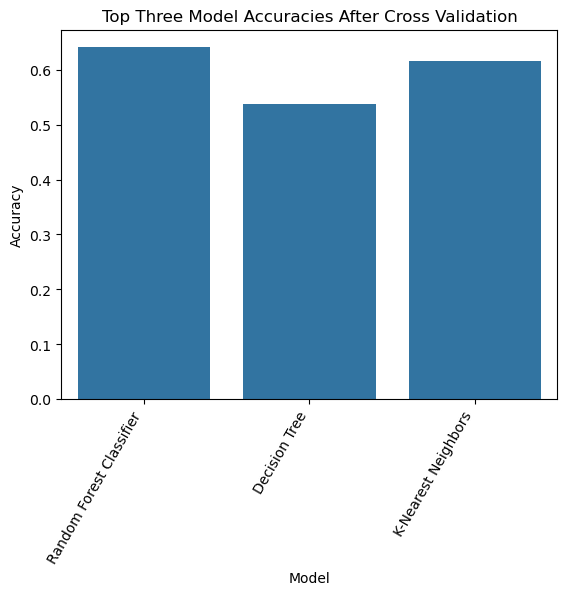

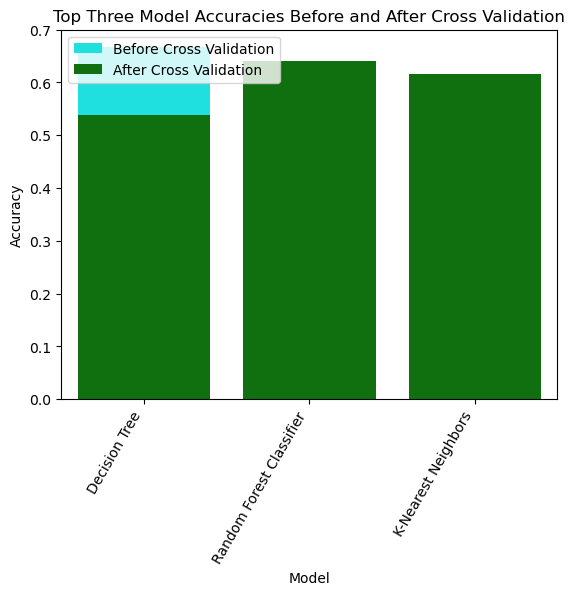

In [ ]:
#plot the top three accuracies after cross validation
print("Top Three Models After Cross Validation:\n", top_three_cv)
plt.figure()
sns.barplot(x='Model', y='Accuracy', data=top_three_cv)
plt.xticks(rotation=60, ha='right')
plt.title('Top Three Model Accuracies After Cross Validation')
plt.show()

#plot the top three accuracies before and after cross validation
plt.figure()
sns.barplot(x='Model', y='Accuracy', data=top_three, color='cyan', label='Before Cross Validation')
sns.barplot(x='Model', y='Accuracy', data=top_three_cv, color='green', label='After Cross Validation')
plt.xticks(rotation=60, ha='right')
plt.title('Top Three Model Accuracies Before and After Cross Validation')
plt.legend()
plt.show()




# <ins>Summary<ins>

# Notes

* The best original score was using the Decision Tree method

* We weren't able to improve significantly upon any of the algorithms through tuning

* None of the algorithms used were particularly accurate, with most of the accuracies being in the 50 - 65 % range

# Takeaways

* The data used for training this model may have highlighted some features that are important, such as:

    * <ins>Sunlight hours:<ins> plants seem to be more likely to fail when over-exposed to sunlight

    * <ins>Humidity:<ins> plants seem to prefer a moderate humidity level (~55%), with higher humidity having a higher failure rate than lower humidity

    * <ins>Temperature:<ins> plants seem more likely to succeed around 26.5 C (~80 F)

    * although not shown to be statistically significant, some other interesting notes:
        * loam soil and organic fertiliizer appeared to show promise. Loam soil is pretty unsurprising,given that truly healthy soil is generally considered loam soil. It might also be worth noting the loam soil did not appear to need as much water (i.e. healthy soil = less water requirements)

        * fertilizer is of particular interest. Current methods for farming and cultivation largely revolve around chemical fertilizers that tend to (not always) have long-term negative consequences. This study (albeit small) supports that organic fertilizers may be better for plants (generally speaking) than chemical fertilizers. While organic fertilizers are often more expensive than chemical fertilizers, if they have an impact on success rate of plants it may be worth using over chemical (better for plants and better for environment and, in turn, the soil)

* The data used for training this model is not particularly useful for actually predicting whether a plant will succeed or fail given its minimal success rate

